In [2]:
import numpy as np
import time
import yfinance as yf
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kurtosis
import scipy.stats as stats


In [4]:
ticker = yf.Ticker("AAPL")

parts = []
ranges = [
    ("2006-01-01", "2011-12-31"),
    ("2012-01-01", "2017-12-31"),
    ("2018-01-01", "2025-12-31"),
]

for start, end in ranges:
    df_part = ticker.history(start=start, end=end, interval="1d", auto_adjust=False)
    parts.append(df_part)
    time.sleep(22)

df = pd.concat(parts).sort_index()
df = df[~df.index.duplicated(keep="first")]

print(df.index.min(), df.index.max(), df.shape)



2006-01-03 00:00:00-05:00 2025-12-30 00:00:00-05:00 (5030, 8)


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03,5030.000000,5030.000000
mean,64.650802,65.347124,63.997210,64.702423,62.628685,3.525171e+08,0.001942,0.002187
std,73.198403,73.985081,72.490036,73.276670,73.202118,3.805290e+08,0.019420,0.113667
min,1.847500,1.888929,1.791429,1.809643,1.518226,1.791060e+07,0.000000,0.000000
25%,11.590268,11.633571,11.477232,11.582857,9.717602,8.867545e+07,0.000000,0.000000
50%,28.243750,28.543750,27.950001,28.247500,25.525363,1.854422e+08,0.000000,0.000000
75%,123.475000,124.863125,121.535000,123.199999,119.842455,5.010740e+08,0.000000,0.000000
max,286.200012,288.619995,283.299988,286.190002,285.922455,3.372970e+09,0.260000,7.000000


In [6]:

df["log_ret"] = np.log(df["Close"]).diff()
df = df.dropna()


In [7]:

adf_result = adfuller(df["log_ret"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -16.84950354347147
p-value: 1.121587914959177e-29
Critical Values: {'1%': -3.431655136974821, '5%': -2.8621167297421373, '10%': -2.567076993884522}


In [8]:
df["log_ret_sq"] = df["log_ret"] ** 2


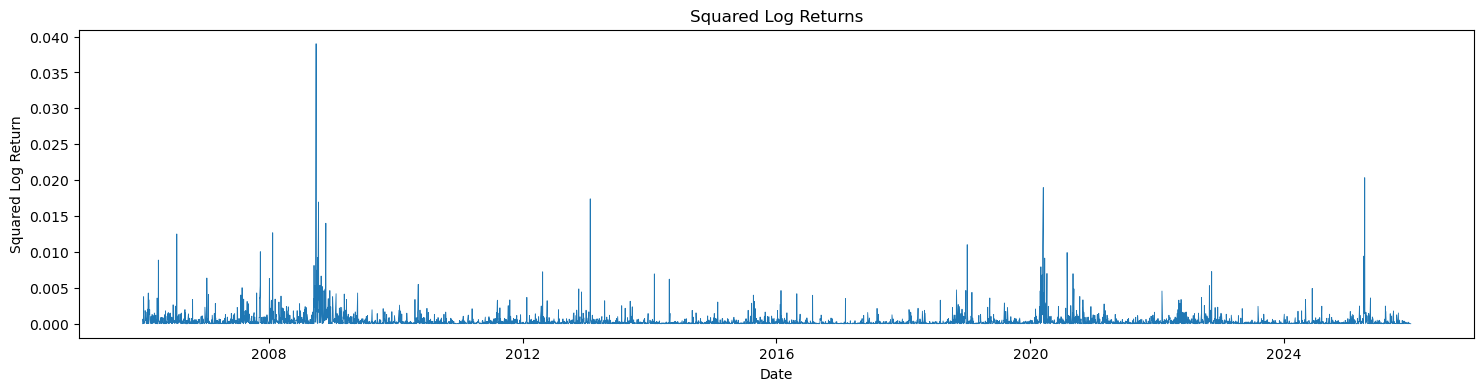

In [11]:
plt.figure(figsize=(18, 4))
plt.plot(df.index, df["log_ret_sq"], linewidth=0.6)
plt.title("Squared Log Returns")
plt.xlabel("Date")
plt.ylabel("Squared Log Return")
plt.show()


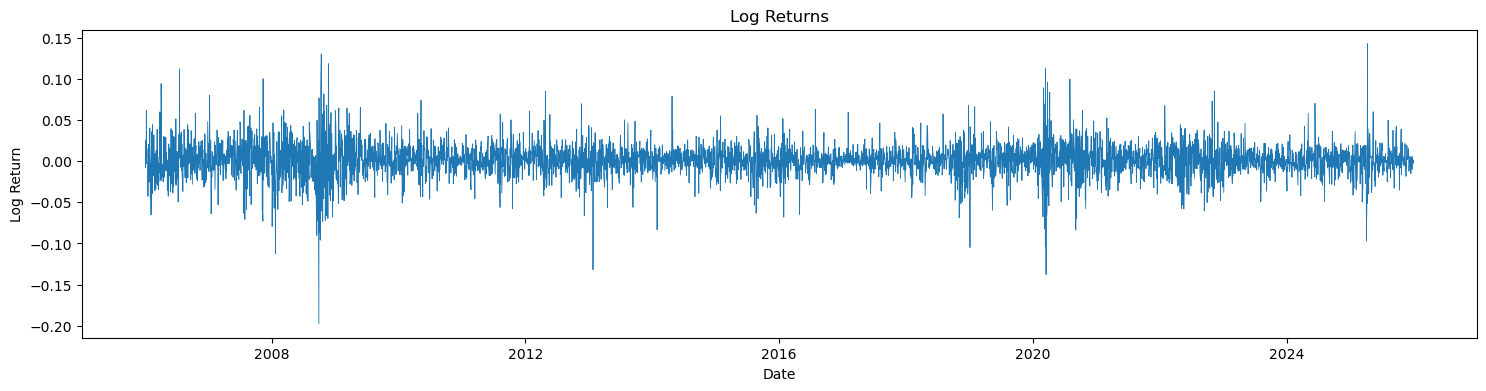

In [12]:
plt.figure(figsize=(18, 4))
plt.plot(df.index, df["log_ret"], linewidth=0.6)
plt.title("Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


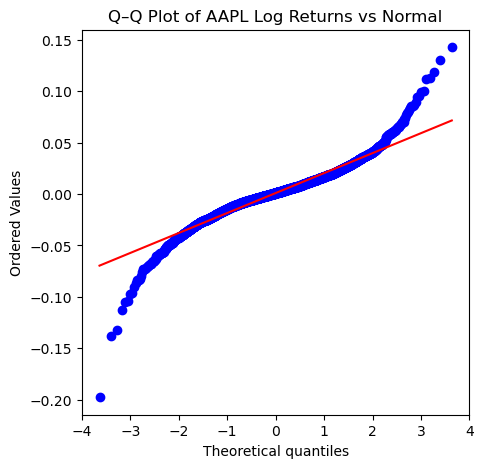

In [13]:
plt.figure(figsize=(5,5))
stats.probplot(df["log_ret"], dist="norm", plot=plt)
plt.title("Q–Q Plot of AAPL Log Returns vs Normal")
plt.show()


In [14]:
kurt = kurtosis(df["log_ret"], fisher=False)  # Pearson kurtosis
excess_kurt = kurt - 3

print("Kurtosis:", kurt)



Kurtosis: 9.539621027469568
